# NCF Analysis

In [1]:
import os
import sys

from matplotlib import pyplot as plt
import datetime
import numpy as np
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import pickle
import scipy
from gwpy.timeseries import TimeSeries
import seaborn as sns
import gwpy
import progressbar

cwd = os.getcwd()
code_dir = os.path.dirname(os.path.dirname(cwd))
sys.path.append(code_dir)

from Noise_Interferometry.Modules import analysis

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [7]:
import matlab.engine
eng = matlab.engine.start_matlab()

## Read Header File

In [2]:
file_name = "/Volumes/Ocean_Acoustics/NCCFs/MJ03F-MJ03E/2020"
exp1 = analysis.NCCF_experiment(file_name, verbose=True)

Start Time: 2020-01-01 00:00:00
Frequency Range: [ 1 90]
Hydrophone Type: low_frequency
Number of Average Periods: 8784
Node 1: Central_Caldera
Node 2: Eastern_Caldera
Window Length (s): 30
Signal Processing Method: sabra_b
Specific Notes: Multi year longterm analysis
Distance Between Nodes: 3.186 km
Bearing from node 1 to 2: 121.6 °


## Average NCFs and Plot for Specified Range

(11999,)
Max Value: 3.03e-03


<Figure size 432x288 with 0 Axes>

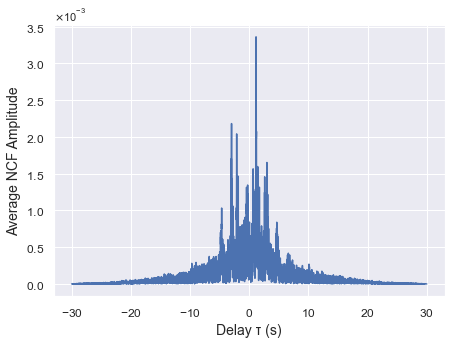

In [4]:
fig2 = plt.figure()
xcorr = exp1.average_NCF(0,300, plot=True)

scientific_notation = "{:.2e}".format(np.max(np.abs(xcorr)))
print(f'Max Value: {scientific_notation}')

## Save Figure

Time of Max Peak: -2.992500000005375


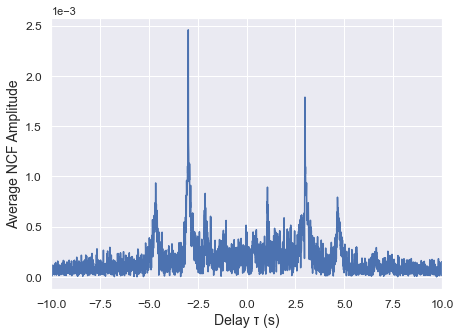

In [10]:
sns.reset_orig()
exp1.NCF_plot(exp1.xcorr, 572, save_fig=True, file_name = '300_hour_TDGF_mag', frequency=False, symetric=False, xlimits=[-10,10], ylimits=None, print_time_delay=True)

## Plot Available Hours for Directory

Number of Available hours: 572


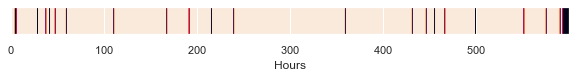

In [36]:
exp1.available_hours()

## Create Symetric Plot

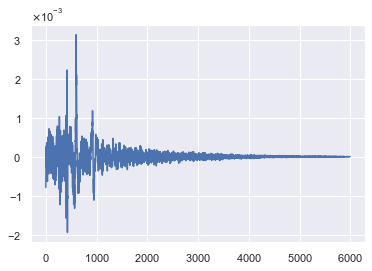

In [37]:
# Create Sum of Both Sides
import math as m

xcorr1 = xcorr[:m.floor(len(xcorr)/2)]
xcorr2 = xcorr[m.ceil(len(xcorr)/2):]

plt.plot(xcorr2 + np.flip(xcorr1))

## Animate TDGF Emergence

[======================================================================= ]  98%

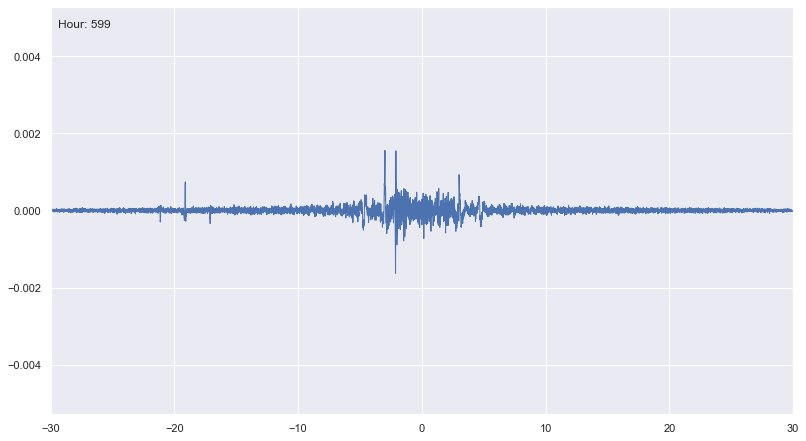

In [97]:
exp1.animate_NCF(600, 10, 'butter_whiten', interval=1)

## Animate without averaging (for TDOA)

[======================================================================= ]  98%

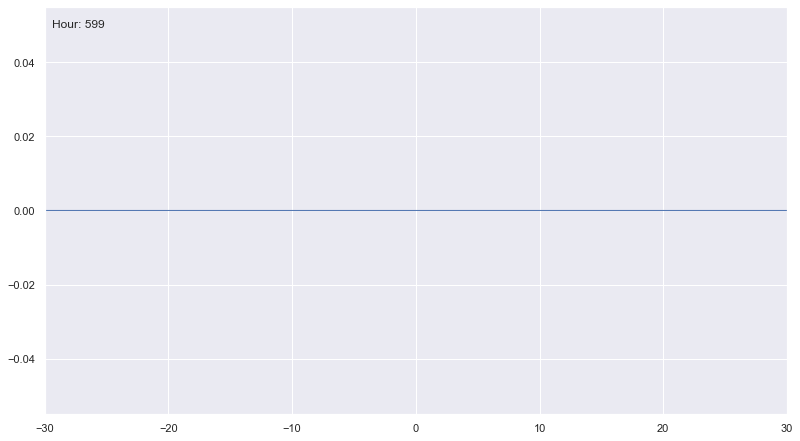

In [120]:
# Animate TDOA
exp1.animate_tdoa2(600, 10, 'tdoa_animation_butter_whiten', interval=1)

## Create Spectrogram of NCF

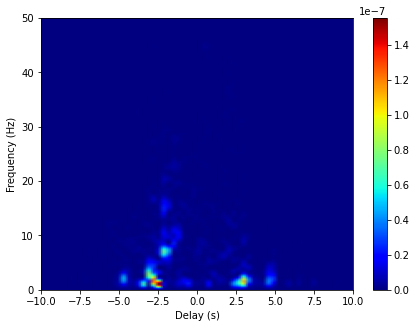

In [7]:
from matplotlib.colors import Normalize
f, t, Sxx = scipy.signal.spectrogram(xcorr, fs=200, nfft=2048, nperseg=128, noverlap=64)
t = t-30
sns.reset_orig()
vmin=0
vmax=np.max(Sxx)*1

fig1 = plt.figure(figsize=(7,5))

plt.pcolormesh(t, f, Sxx, shading='gouraud',cmap=plt.cm.jet, norm=Normalize(vmin=vmin, vmax=vmax))
plt.ylim([0,50])
plt.xlim([-10,10])
plt.xlabel('Delay (s)')
plt.ylabel('Frequency (Hz)')

plt.colorbar()

# fig1.savefig('spectrogram_sabra_freqclip_compressed.png',dpi=500)

# Editing Header File
For specific edits, hard code change the function NCF_tools.edit_header()

In [49]:
import NCCF_experiment as NCF
file_name = "/Volumes/John's Passport/University of Washington/NCFs/ckpts_15"
exp1 = analysis.NCCF_experiment(file_name)

exp1.edit_header()

exp1.read_header()

2017-03-10 00:00:00
[  0.5  10. ]
low_frequency
300
Central_Caldera
Eastern_Caldera
30
sabra
Experimenting with smaller frequency band
2017-03-10 00:00:00
[  0.5  10. ]
low_frequency
600
Central_Caldera
Eastern_Caldera
30
sabra
Experimenting with smaller frequency band


## Animate 360 Phase Shift
must load exp using NCCF_experiment toolset

[                                                                        ] N/A%/Users/jhrag/opt/anaconda3/envs/ooi/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
[======================================================================= ]  98%

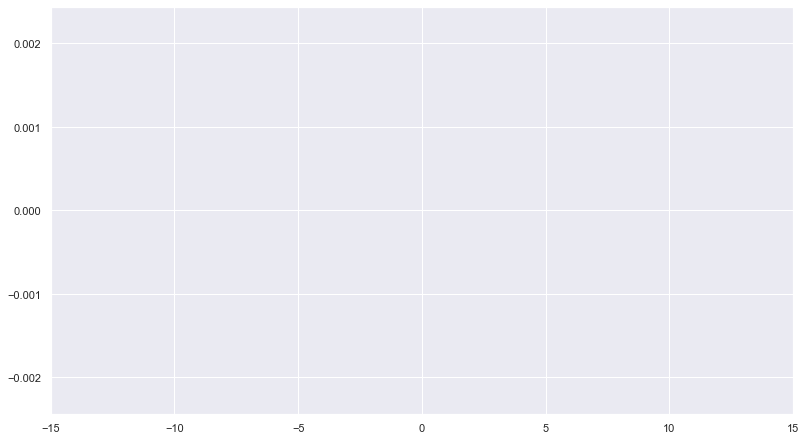

In [126]:
exp1.animate_phase(exp1.xcorr, 'phase_animation_butter_white', xlim=[-15,15])

## Plotting SNR vs Average Time

[========================================================================] 100%

CPU times: user 2.29 s, sys: 1.29 s, total: 3.58 s
Wall time: 3.59 s


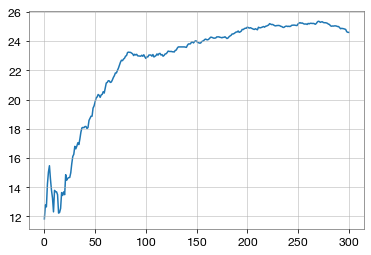

In [158]:
%%time

file_name = "/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/NCFs/MJ03F-MJ03E/2017"
exp1 = analysis.NCCF_experiment(file_name)


SNR = exp1.SNR_plot(600,900, peak_id='s1b0B', plot=False, )


## Spectrogram SNR Overlay

### Create Spectrogram from File

In [7]:
# Get Spectrogram Values
import pickle
import progressbar
spec_start = 0
spec_end = 600


bar = progressbar.ProgressBar(maxval=spec_end-spec_start, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

time = []
for k in range(spec_start,spec_end):
    
    file_path = f"/Volumes/John's Passport/Spectrograms/Central_Caldera/Central_Caldera_July/spectrogram{k:03}.pkl"
    try:
        with open(file_path, 'rb') as f:
            spec = pickle.load(f)
    except:
        #values_NaN = np.empty((60,2049))
        #values_NaN[:] = np.nan
        #time_NaN = np.empty(60)
        #time_NaN[:] = np.nan
        #values = np.vstack((values,values_NaN))
        #times = np.hstack((times,time_NaN))
        continue
    if spec == None:
        #values_NaN = np.empty((60,2049))
        #values_NaN[:] = np.nan
        #time_NaN = np.empty(60)
        #time_NaN[:] = np.nan
        #values = np.vstack((values,values_NaN))
        #times = np.hstack((times,time_NaN))
        continue
    
    time_UTC = spec.time
    if k == spec_start:
        freq = spec.freq
    for n in range(len(time_UTC)):
        if n == 0:
            time = [time_UTC[n].datetime]
        else:
            time.append(time_UTC[n].datetime)
    if k == spec_start:
        values = spec.values
        times = np.asarray(time)
    else:
        values = np.vstack((values,spec.values))
        times = np.hstack((times,np.asarray(time)))
    bar.update(k- spec_start)
    

[======================================================================= ]  98%

In [8]:
# Generate alternate time variables
from datetime import timedelta

times_delta = []
times_new = np.zeros((len(times),1))
for k in range(len(times)):
    times_delta.append(times[k]-times[0])
    
    times_new[k] = times_delta[k].days*24 + times_delta[k].seconds/3600


times_new = np.squeeze(times_new)

print(np.shape(times_new))

(35621,)


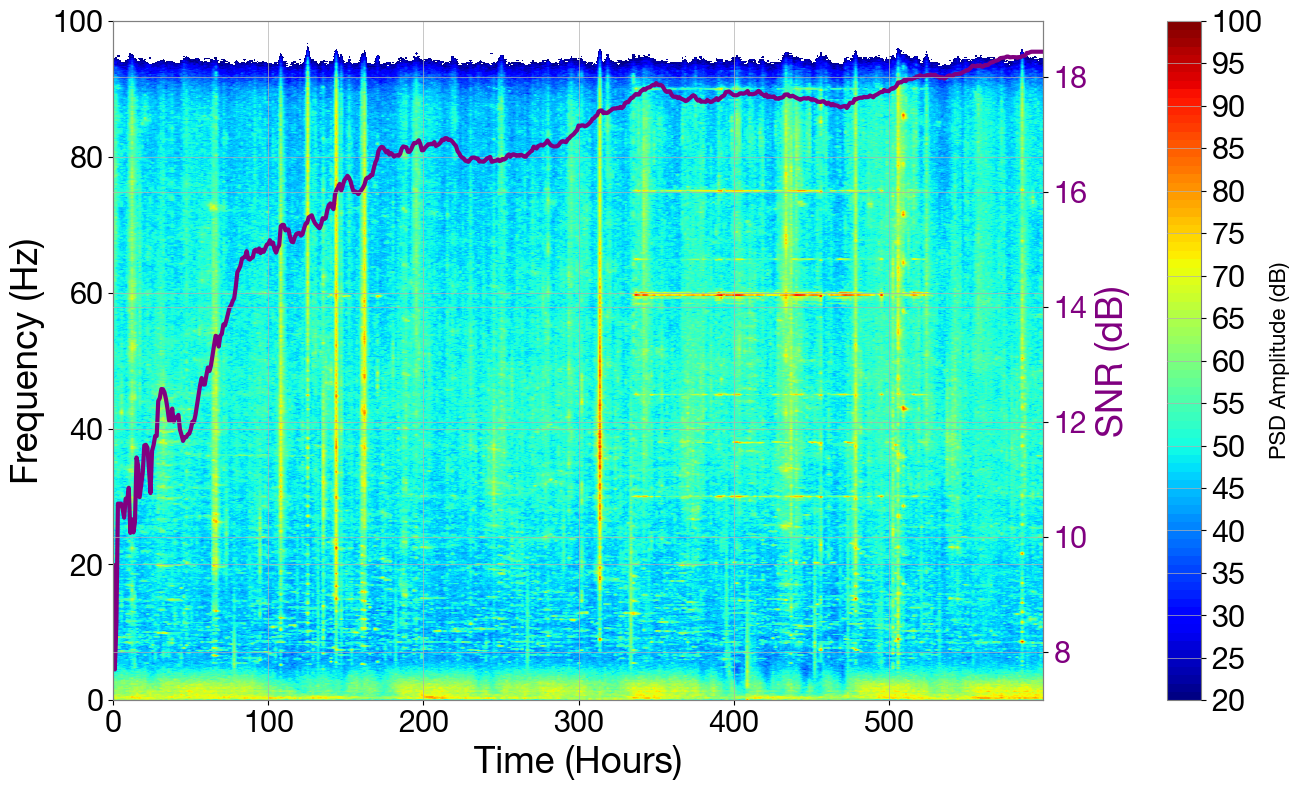

In [9]:
import matplotlib.colors as colors
import matplotlib

sns.reset_orig()
vmin = 20
vmax = 100
vdelta = 1
figsize = (16,9)
dpi = 100
fmin = 0
fmax = 100
time_limits = None
xlabel_rot = 0
time = times_new
ylabel = 'Frequency (Hz)'
xlabel = 'Time (Hours)'
vdelta_cbar = 5

res_reduction_time = 100
res_reduction_freq = 1


font = {'size': 22}
matplotlib.rc('font', **font)
        
v = values[::res_reduction_time, ::res_reduction_freq]

if len(time) != len(values):
    t = np.linspace(0, len(values) - 1,
                    int(len(values) / res_reduction_time))
else:
    t = time[::res_reduction_time]
            
        
if len(freq) != len(values[0]):
    f = np.linspace(0, len(values[0]) - 1,
                    int(len(values[0]) / res_reduction_freq))
else:
    f = freq[::res_reduction_freq]
            
cbarticks = np.arange(vmin, vmax + vdelta, vdelta)
fig, ax = plt.subplots(figsize=(figsize), dpi=dpi)
im = ax.contourf(t, f, np.transpose(v), cbarticks,
                 norm=colors.Normalize(vmin=vmin, vmax=vmax),
                 cmap=plt.cm.jet)
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.ylim([fmin, fmax])
if time_limits is not None:
    plt.xlim(time_limits)
plt.xticks(rotation=xlabel_rot)
#plt.title(title)
cbar = plt.colorbar(im, ax=ax,
             ticks=np.arange(vmin, vmax + vdelta, vdelta_cbar), pad=0.1)

cbar.ax.set_ylabel('PSD Amplitude (dB)', rotation=90, fontsize='16')
plt.tick_params(axis='y')


# Add SNR Plot
ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

color = 'purple'
ax2.set_ylabel('SNR (dB)', color=color)  # we already handled the x-label with ax1
ax2.plot(SNR, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

fig.savefig('SNR_and_Spectrogram_butter_whiten.png',dpi=dpi)

# Map Bearing Features

In [37]:

file_name = "/Users/jhrag/UW/Ocean_Acoustics/Code/Noise_Interferometry/NCFs/ckpts_16"
exp1 = analysis.NCCF_experiment(file_name, verbose=True)

Start Time: 2017-07-01 00:00:00
Frequency Range: [ 1 90]
Hydrophone Type: low_frequency
Number of Average Periods: 600
Node 1: Central_Caldera
Node 2: Eastern_Caldera
Window Length (s): 30
Signal Processing Method: sabra
Specific Notes: Looking at summertime NCF
Distance Between Nodes: 3.186 km
Bearing from node 1 to 2: 121.6 °


In [38]:
bearing = exp1.get_bearing_angle(-1.4325000000056853)

exp1.plot_map_bearing(bearing)

## TDGF Moving Average (For Long Term Analysis)

In [3]:
file_name = "/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/NCFs/MJ03F-MJ03E/2017"
exp1 = analysis.NCCF_experiment(file_name, verbose=True)

#exp1.available_hours(savefig=True)
#print(exp1.num_available)

Start Time: 2017-01-01 00:00:00
Frequency Range: [ 1 90]
Hydrophone Type: low_frequency
Number of Average Periods: 8760
Node 1: Central_Caldera
Node 2: Eastern_Caldera
Window Length (s): 30
Signal Processing Method: sabra_b
Specific Notes: Butterworth and Hann Window for whitening. Longterm Analysis
Distance Between Nodes: 3.186 km
Bearing from node 1 to 2: 121.6 °


In [7]:
nccfs_array = exp1.MA_TDGF(365,10,start_hour=0,end_hour=8760, verbose=True)

[========================================================================] 100%

In [144]:
print(nccfs_array.peak_slices['dA'])

slice(5535, 5635, None)


### Plot number of average hours per data

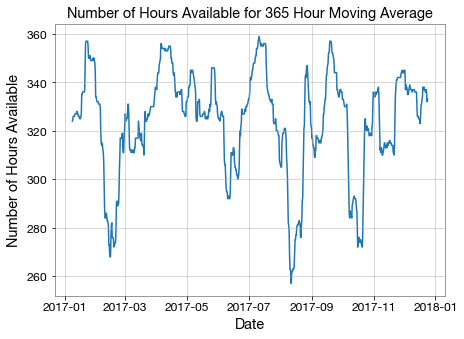

In [8]:
fig = plt.figure(figsize=(7,5))

plt.plot(nccfs_array.dates, nccfs_array.num_available)
plt.title('Number of Hours Available for 365 Hour Moving Average')
plt.ylabel('Number of Hours Available')
plt.xlabel('Date')

fig.savefig('num_available_2017.png',dpi=400)

## NCCFs_array class methods

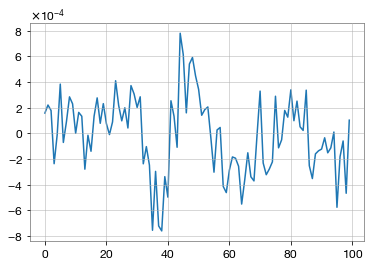

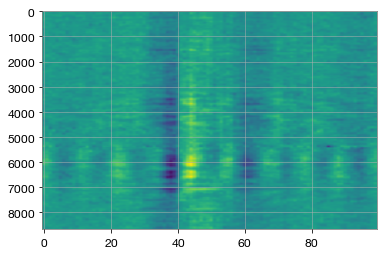

In [90]:
peak_slice = tdgf.peaks['dA']
# plt.imshow(peak_slice, aspect='auto')
plt.plot(peak_slice[50,:])

plt.figure()
plt.imshow(peak_slice,aspect='auto')

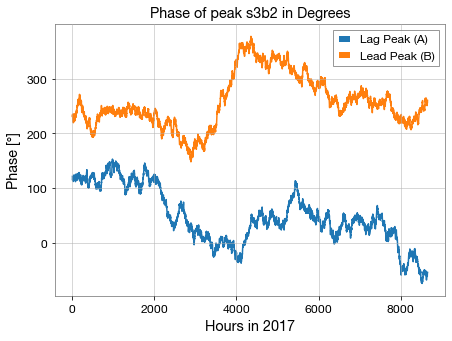

In [106]:
peak = 's3b2'
phaseA  = tdgf.phase_of_peak(peak+'A')
phaseB = tdgf.phase_of_peak(peak+'B')

fig = plt.figure(figsize=(7,5))
plt.plot(np.unwrap(phaseA))
plt.plot(np.unwrap(phaseB))
plt.legend(['Lag Peak (A)','Lead Peak (B)'], loc='upper right')
plt.xlabel('Hours in 2017')
plt.ylabel(f'Phase [°]')
plt.title(f'Phase of peak {peak} in Degrees')
filename = f'phase_2017_{peak}.png'
fig.savefig(filename, dpi=400)


In [6]:
# Save to .mat File
mdic = {"tdgf": tdgf}
scipy.io.savemat('tdgf_july-aug.mat',mdic)

In [25]:
tdgf.NCCFs.shape

(898, 11999)

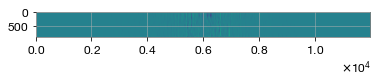

In [26]:
plt.imshow(tdgf.NCCFs)

In [16]:
t = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4]])
t[0:3,:]

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [62]:

temp = tdgf.SNR_plots()

0 364
0 1


In [61]:
temp

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

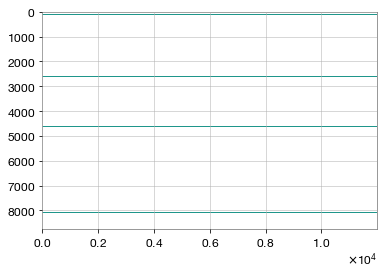

In [73]:
plt.imshow(tdgf.NCCFs,aspect='auto')

## Signal.find_peaks

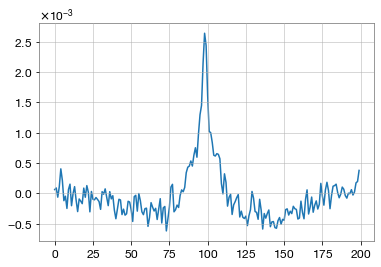

In [110]:
peak = tdgf.peaks['s1b0A'][0,:]

plt.plot(peak)

In [111]:
scipy.signal.find_peaks(peak)

(array([  1,   4,   7,  10,  13,  16,  19,  21,  24,  27,  31,
         33,  36,  38,  42,  45,  48,  53,  55,  60,  63,  66,
         69,  72,  77,  80,  83,  89,  92,  98, 106, 111, 115,
        120, 122, 125, 129, 134, 137, 140, 143, 147, 149, 152,
        154, 156, 161, 165, 168, 171, 174, 178, 184, 188, 192, 194]),
 {})

## building / debugging 2D SNR Plots
Build nccfs_array above with MA section

In [32]:
start = 1
end = 600

nccf_avg = []
count = 0
for k in range(start,end):
    # Create average NCCF
    nccf_slice = nccfs_array.NCCFs[start:k+1,:]
    nccf_avg.append(np.mean(nccf_slice,axis=0))

nccf_avg = np.array(nccf_avg)

In [33]:
nccf_avg.shape

(599, 11999)

In [34]:
nccf_avg[100,:]

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

(0.0, 18.0)

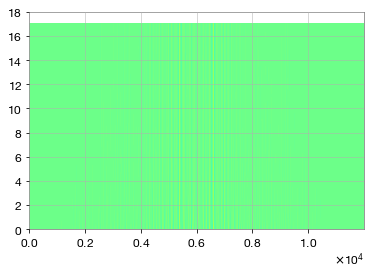

In [41]:
plt.imshow(nccf_avg,aspect='auto',cmap='jet')
plt.ylim([0,18])

## Working on SNR_plots functions

In [18]:
file_name = "/Users/jhrag/Code/ocean_acoustics/Noise_Interferometry/NCFs/MJ03F-MJ03E/2017"
exp1 = analysis.NCCF_experiment(file_name, verbose=True)

Start Time: 2017-01-01 00:00:00
Frequency Range: [ 1 90]
Hydrophone Type: low_frequency
Number of Average Periods: 8760
Node 1: Central_Caldera
Node 2: Eastern_Caldera
Window Length (s): 30
Signal Processing Method: sabra_b
Specific Notes: Butterworth and Hann Window for whitening. Longterm Analysis
Distance Between Nodes: 3.186 km
Bearing from node 1 to 2: 121.6 °


In [64]:
SNR, last_valid, SNR_ma = exp1.SNR_plot(1, 600, 's1b0A')

[========================================================================] 100%

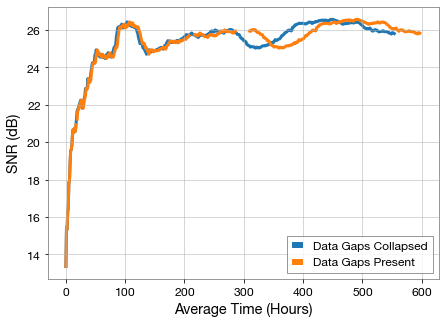

In [107]:
fig1 = plt.figure(figsize=(7,5))

plt.plot(SNR_ma[~SNR_ma.mask],linewidth=3)
plt.plot(SNR_ma,linewidth=3)
plt.xlabel('Average Time (Hours)')
plt.ylabel('SNR (dB)')
plt.legend(['Data Gaps Collapsed','Data Gaps Present'])
plt.savefig('Both_Options.png',dpi=400)

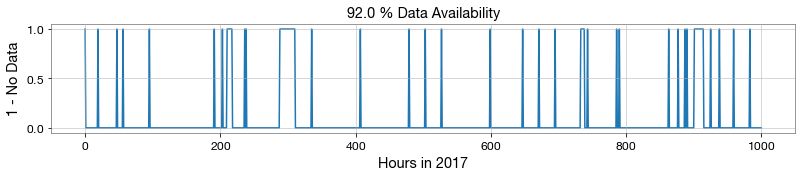

In [43]:
fig1 = plt.figure(figsize=(13.33,2))
plt.plot(last_valid)
plt.ylabel('1 - No Data')
plt.xlabel('Hours in 2017')
plt.title(f'{(1000 - np.sum(last_valid))/10} % Data Availability')
fig1.savefig('Data_Availability.png', dpi=400)

## Creating SNR Plots Figure

In [135]:
filename = 'SNRs.pkl'
with open(filename, 'rb') as f:
    SNRs = pickle.load(f)

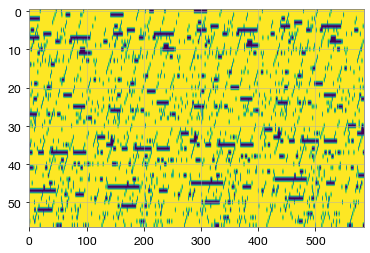

In [132]:

mask = SNRs.mask
mask = -1*(mask-1)
plt.imshow(np.squeeze(mask[0,:,:]),aspect='auto')

np.logical_not(SNRs.mask)

#SNRs2 = np.ma.masked_array(SNRs.data, np.logical_not(SNRs.mask))

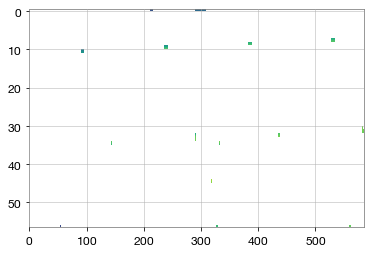

In [134]:
plt.imshow(np.squeeze(SNRs2[0,:,:]),aspect='auto')

"\nfig1, axes = plt.subplots(nrows=4, ncols=2,figsize=(20,20))\ncount = 0\nfor ax in axes.flat:\n    im = ax.imshow(np.squeeze(SNRs[k,:,:]),aspect='auto', origin='lower', vmin=0, vmax=10, cmap='jet')\n    ax.set_title(peak_names[count])\n    count = count + 1\n    \nfig1.subplots_adjust(right=0.8)\ncbar_ax = fig1.add_axes([0.85, 0.15, 0.05, 0.7])\nfig1.colorbar(im, cax=cbar_ax)\n\nplt.show()\n"

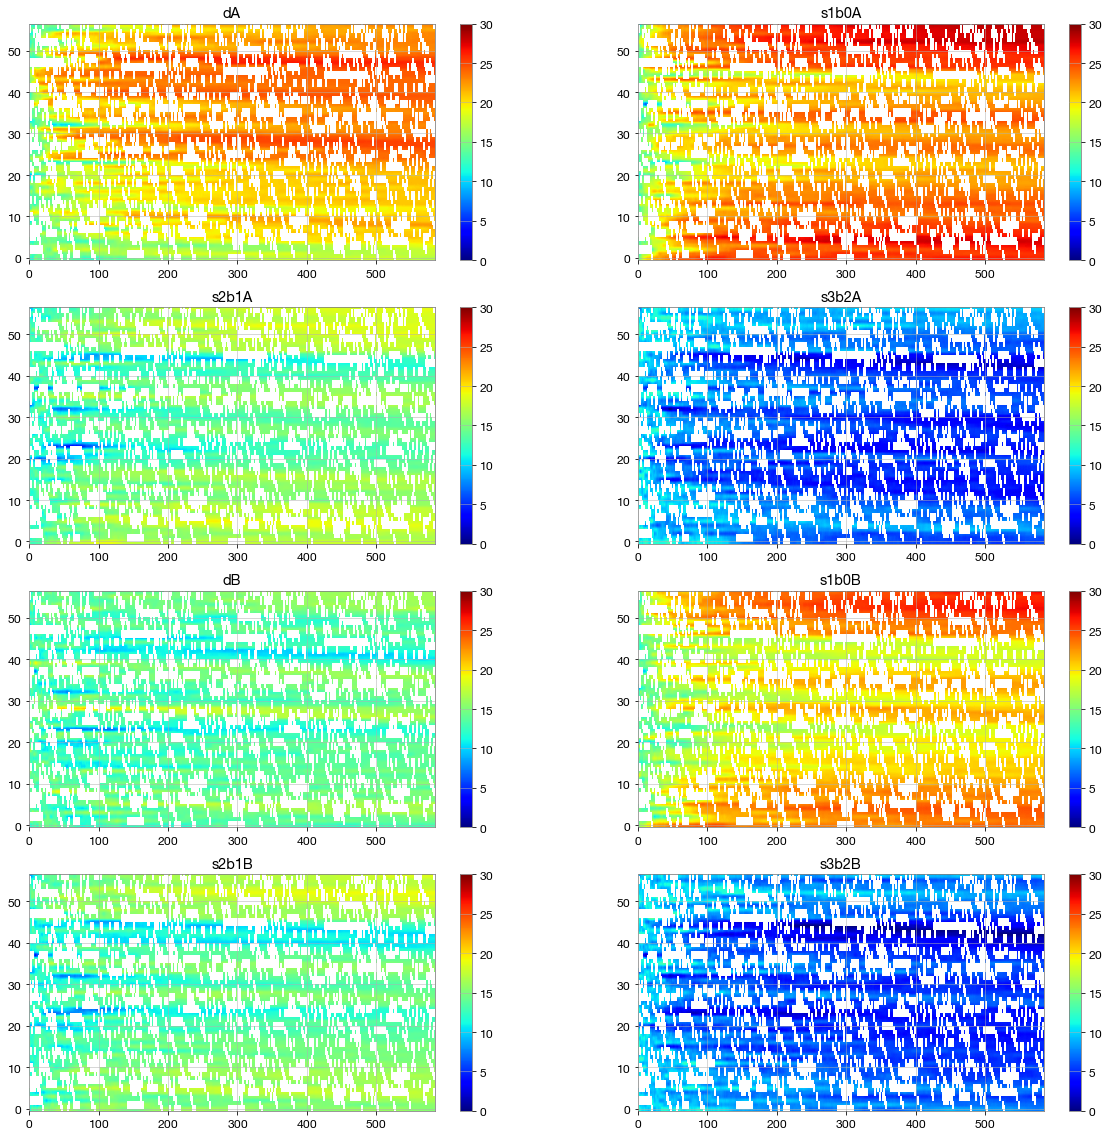

In [182]:
# Create Subplots with missing data
fig1 = plt.figure(figsize=(20,20))

peak_names = ['dA', 's1b0A', 's2b1A', 's3b2A', 'dB', 's1b0B', 's2b1B', 's3b2B']

for k in range(8):
    plt.subplot(4,2,k+1)
    plt.imshow(np.squeeze(SNRs[k,:,:]),aspect='auto', origin='lower', vmin=0, vmax=30, cmap='jet')
    plt.title(peak_names[k])
    plt.colorbar()
    
    
fig1.savefig('SNR_plots_gap.png',dpi=300)


### Make Gapless Plots

In [183]:
SNRs_no_gap = np.zeros(SNRs.shape)

for k in range(8):
    for n in range(57):
        no_gap = SNRs[k,n,~SNRs.mask[k,n,:]]
        SNRs_no_gap[k,n,:no_gap.shape[0]] = no_gap

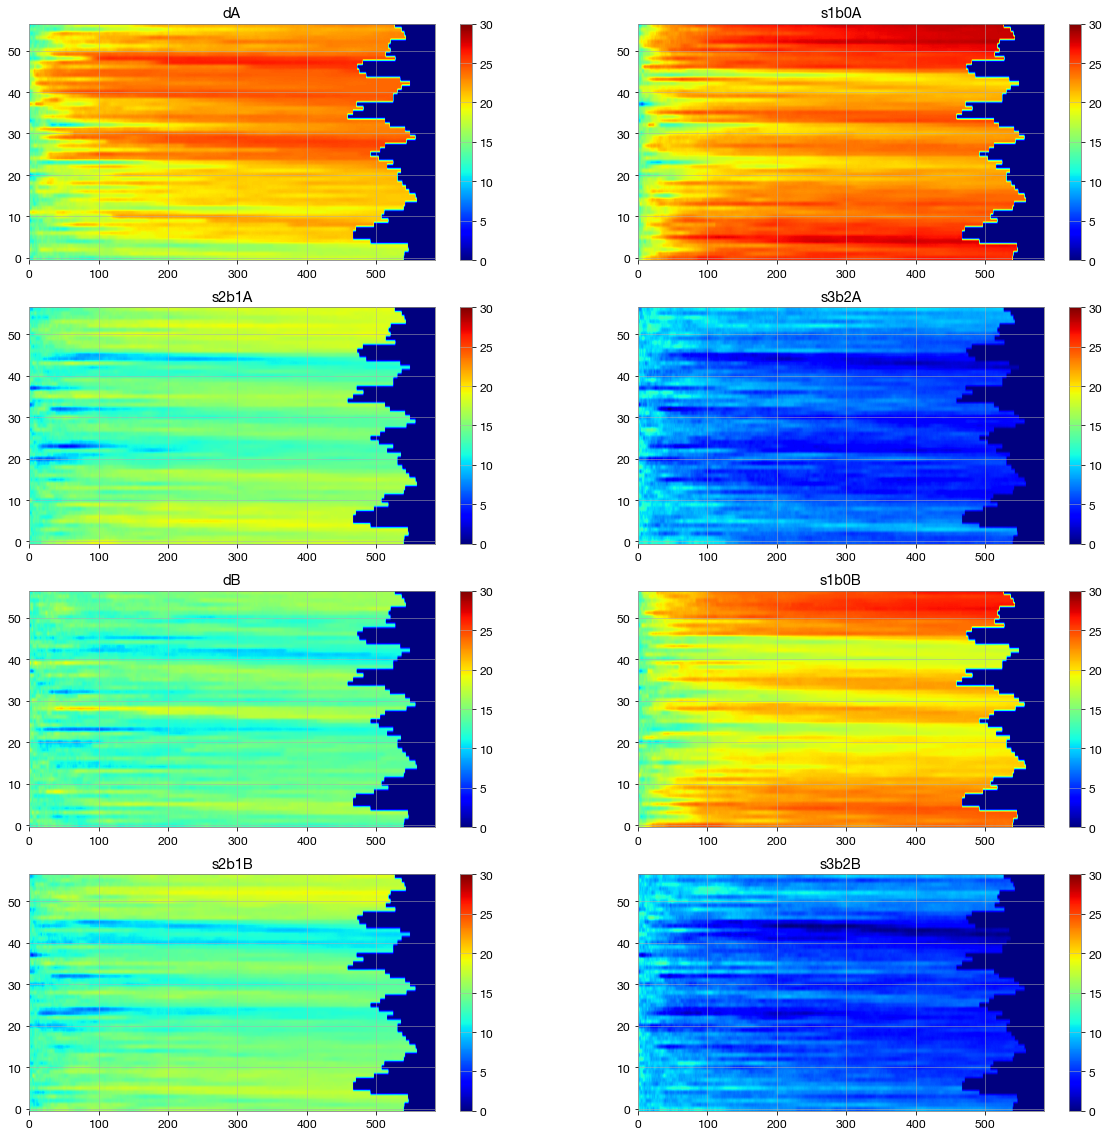

In [184]:
# Create Subplots with missing data
fig2 = plt.figure(figsize=(20,20))

peak_names = ['dA', 's1b0A', 's2b1A', 's3b2A', 'dB', 's1b0B', 's2b1B', 's3b2B']
for k in range(8):
    plt.subplot(4,2,k+1)
    plt.imshow(np.squeeze(SNRs_no_gap[k,:,:]),aspect='auto', origin='lower', vmin=0, vmax=30, cmap='jet')
    plt.title(peak_names[k])
    plt.colorbar()
    
fig2.savefig('SNR_plots_no_gap.png',dpi=300)

## Playing with Python

In [77]:
import datetime

SNR = np.random.rand(24,301,1)*26
avg_hours = np.arange(1,SNR.shape[1]+1)

start_time = datetime.datetime(2017,1,1)
dates = []
hours_to_add_np = np.arange(182.5,8760, 365)
hours_to_add = []
for k in range(len(hours_to_add_np)):
    hours_to_add.append(datetime.timedelta(hours=hours_to_add_np[k]))
    dates.append(start_time + hours_to_add[k])   
    
dates = np.array(dates)
print(SNR.shape, avg_hours.shape, dates.shape)

(24, 301, 1) (301,) (24,)


In [226]:
SNR2 = np.squeeze(SNR)

In [228]:
mdic = {"SNR": SNR2}
scipy.io.savemat('2017_SNR_plot.mat',mdic)

In [222]:
type(SNR_mat)

float

## Manually Adding Header Files

In [9]:
from Noise_Interferometry.Modules import calculate

year=2020
file_base = '/Volumes/Ocean_Acoustics/NCCFs/MJ03F-MJ03E/'
file_dir = f'{file_base}{year}/'
if year % 4 == 0:
    leap = True
else:
    leap = False

if leap:
    num_periods = 8784
else:
    num_periods = 8760

avg_time = 60  #minutes 
start_time = datetime.datetime(year,1,1) # time of first sample
node1 = 'Central_Caldera'
node2 = 'Eastern_Caldera'
filter_cutoffs = np.array([1, 90])
W = 30
htype = 'low_frequency'
whiten= True

kstart = 0

other_notes = 'Multi year longterm analysis'
sp_method = 'sabra_b'

calculate.calculate_NCF_loop(num_periods, node1, node2, avg_time, start_time, W, filter_cutoffs, file_dir=file_dir, verbose=True, whiten=whiten, htype=htype, kstart=kstart, sp_method = sp_method, other_notes=other_notes)